In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import io
import os
import warnings

from IPython.display import display
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation

<IPython.core.display.Javascript object>

In [3]:
STABILITY_API_KEY = os.environ.get("STABILITY_API_KEY")

<IPython.core.display.Javascript object>

In [4]:
stability_api = client.StabilityInference(
    key=STABILITY_API_KEY, verbose=False, engine="stable-diffusion-v1-5",
)

<IPython.core.display.Javascript object>

In [5]:
# response = stability_api.generate(
#     prompt="expansive landscape rolling greens with blue daisies and weeping willow trees under a blue alien sky, artstation, masterful, ghibli",
#     seed=992446758,
#     steps=30,
#     cfg_scale=8.0,
#     width=512,
#     height=512,
#     samples=2,
#     sampler=generation.SAMPLER_K_DPMPP_2M,
# )

<IPython.core.display.Javascript object>

In [6]:
img = Image.open("images/image_992446758.png")

<IPython.core.display.Javascript object>

In [7]:
response = stability_api.upscale(init_image=img, height=1024,)

<IPython.core.display.Javascript object>

image file name:  images/image_0.png


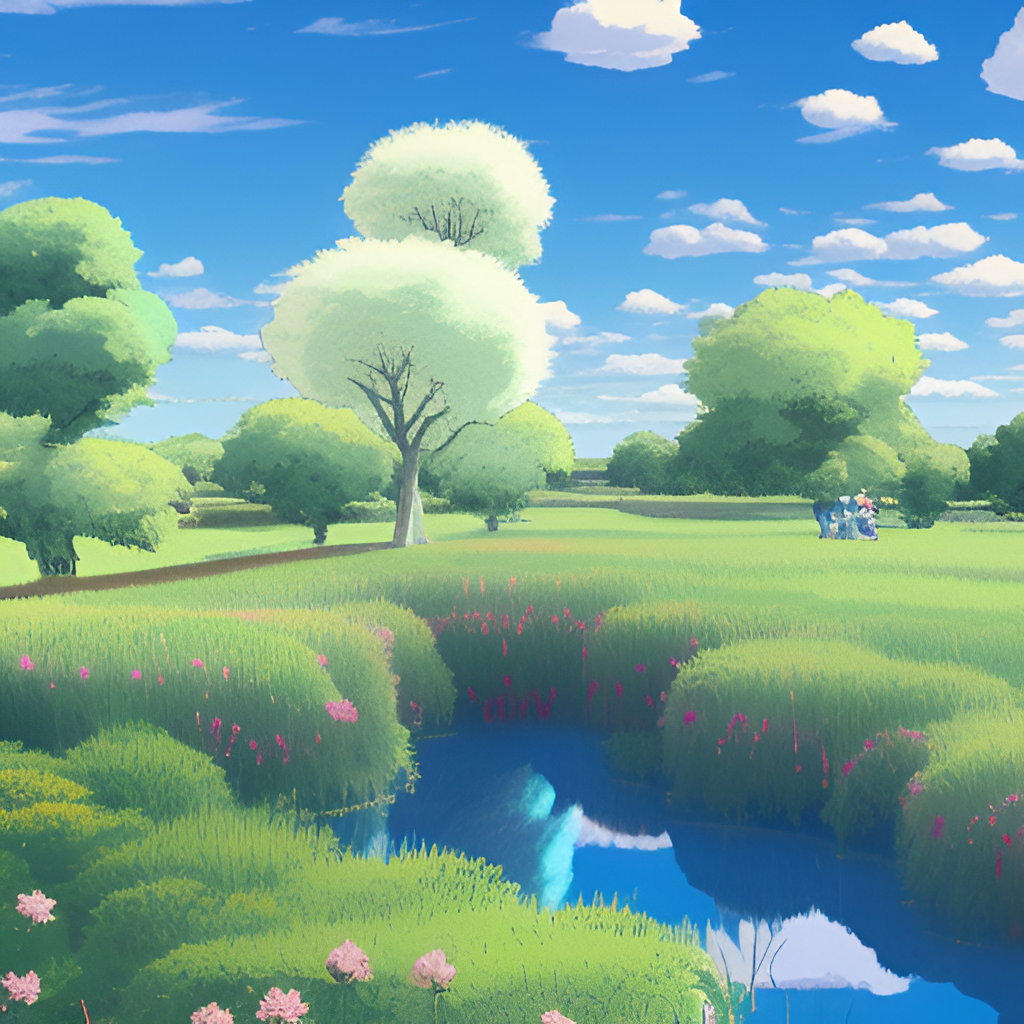

<IPython.core.display.Javascript object>

In [8]:
for resp in response:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn("Safety filters activated")
        if artifact.type == generation.ARTIFACT_IMAGE:
            file_name = "images/image_" + str(artifact.seed) + ".png"
            print("image file name: ", file_name)
            with open(file_name, "wb") as image_file:
                image_file.write(artifact.binary)
            img2 = Image.open(io.BytesIO(artifact.binary))
            display(img2)

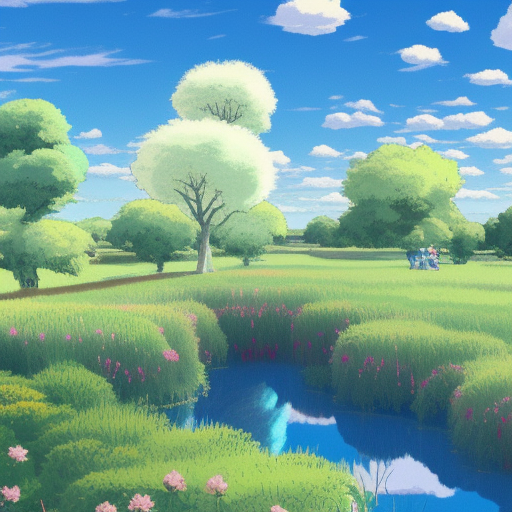

<IPython.core.display.Javascript object>

In [10]:
display(img)

In [9]:
print("original image size: ", img.size)
print("upscaled image size: ", img2.size)

original image size:  (512, 512)
upscaled image size:  (1024, 1024)


<IPython.core.display.Javascript object>